In [1]:
import pandas as pd
import numpy as np

# 화면에 출력하는 데이터 프레임의 최대 row 수를 100으로 설정합니다.
pd.set_option('display.max_rows', 100)

# 화면에 출력하는 데이터 프레임의 최대 column 수를 100으로 설정합니다.
pd.set_option('display.max_columns', 100)

import matplotlib
import matplotlib.pyplot as plt  # 파이플롯 사용
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')  # 한글코드를 더 선명하게 해주는 조치, 레티나 설정
matplotlib.rc('font', family='AppleGothic') # 폰트 설정
matplotlib.rc('axes', unicode_minus=False) # 마이너스 폰트가 깨지는 경우가 있으므로 조치

In [31]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', 'This pattern has match groups')
warnings.filterwarnings('ignore', 'The iterable function was deprecated in Matplotlib')

In [2]:
df = pd.read_excel("1984-2018출입국국가별월별통계_nw.xlsx", encoding='euc-kr', header=2)

In [3]:
drop_year_list = "1984년	1985년	1986년	1987년	1988년	1989년	1990년	1991년	1992년	1993년	1994년	1995년	1996년	1997년	1998년".split()
df = df.drop(drop_year_list, axis = 1)

In [4]:
year_month_list = df.columns.tolist()
year_month_list.remove('Country')
year_month_list.remove('국가명')

In [5]:
new_year_month_list = ['Country', '국가명']
for item in year_month_list:
    year = item.split()[0]
    year = year.split(".")[0]
    year = year.split("년")[0]
    year = year[-2:]
    
    month = item.split()[0]
    if "."in(month):
        month = month.split(".")[1]
    else:
        month = month.split("년")[1]
    month = month[:-1]
    new_item = str(year) + "_" +str(month)
    new_year_month_list.append(new_item)

In [6]:
df.columns = new_year_month_list

In [7]:
# 상단부 토탈 합계를 나타내는 데이터는 분리 취급
df_total_info = df.iloc[:4].drop(1, axis=0).reset_index().drop('index', axis=1)

In [8]:
# null 을 0으로 채우도 Int 로 변환

df = df.fillna(0)

In [ ]:
# 찾아라 object! - for로 일일이 전환해보면서 에러 뜬 행을 찾음

for num in range(289):
    print(num)
    df.iloc[num, 2:].astype(int)

    
# 153번 행 이라는 걸 발견 - 안도라 국가

In [10]:
df.loc[df['국가명'] == '안도라', '00_5'] = 0.0

In [11]:
new_df = df.iloc[:, 2:].astype(int)

In [12]:
new_df['Country'] = df['Country']
new_df['국가명'] = df['국가명']

In [13]:
country_null_index = df.loc[df['Country'].isnull()].index.tolist()
country_null_index_below_index = [item + 1 for item in country_null_index]
country_null_index_upper_index = [item - 1 for item in country_null_index]
df.loc[df.index.isin(country_null_index_below_index) | df.index.isin(country_null_index_upper_index) ]

# 쭉 살펴보니... 찾았다 대륙 인덱스들
continental_index = [5, 41, 67, 126, 189, 222, 287]
continental_list = df.loc[df['Country'].index.isin(continental_index), 'Country'].tolist()

In [14]:
# 대륙 - 인덱스 를 표기한 dict 데이터 형성
mix_list = [None]*(len(continental_index)+len(continental_list))
mix_list[::2] = continental_index
mix_list[1::2] = continental_list

mix_dict = []

for i in range(0,len(mix_list),2):
    mix_dict.append((mix_list[i+1], mix_list[i]))

mix_dict = dict(mix_dict)
continental_dict=mix_dict
print("아시아의 인덱스는? ", continental_dict['ASIA'])
print("인덱스 5의 표기는? ", df.loc[df.index.isin([5]), 'Country' ])

아시아의 인덱스는?  5
인덱스 5의 표기는?  5    ASIA
Name: Country, dtype: object


In [15]:
continental_dict

{'ASIA': 5,
 'Middle East Asia': 41,
 'Americas': 67,
 'Europe': 126,
 'Oceania': 189,
 'AFRICA': 222,
 'Stateless': 287}

### 대륙마다 df를 자르자
- 대륙 칼럼을 추가
- 그 칼럼 토대로 loc 해서 자르면 쉬움

In [16]:
new_df['cont'] = ""
for key, value in continental_dict.items():
    new_df.iloc[value : , -1] = key

In [17]:
# 연도별 합은 별도의 리스트로 만들어서 열람하고자 할 때만 열어서 관리

except_year_columns = ["99_", "00_"]
for num in range(10):
    num_ = "0" + str(num) + "_"
    except_year_columns.append(num_)

for num in range(10,19):
    num_ = str(num) + "_"
    except_year_columns.append(num_)

#### 연도별 합을 통해 보고 싶다면

new_df_asia_year = new_df_asia[except_year_columns]

를 통해 연도별 집계만 볼 수 있다

#### 월별 추이를 다 보고 싶다면

except_year_columns를 drop시켜야함

In [20]:
# 연도별 합만 보기
#new_df_year = new_df[except_year_columns]
#new_df_year['국가명'] = new_df['국가명']
#new_df_year = new_df_year.set_index('국가명')
#new_df_year = new_df_year.iloc[7:]

# 월별추이 보기
new_df = new_df.drop(except_year_columns, axis=1)
new_df = new_df.set_index('국가명')
new_df = new_df.iloc[7:]

#### 대륙간 구분하기 

In [22]:
# 원하는 대륙 선택
new_df_cont = new_df.loc[new_df['cont'] == 'ASIA']

# 원하는 국가가 있다면 특정 국가로 좁히기 (권장)
new_df_asia.loc[new_df_asia.index.isin(['일본','중국','인도'])]


# 트랜스포즈해야 lineplot을 찍을 수 있다

plot_data = new_df_cont.loc[new_df_cont.index.isin(['일본','중국','인도'])].T

# 쓸데 없는 country, 대륙 파트 커팅 + 내용물이 이상하게 Object로 되어있더라?
plot_data_cut = plot_data.iloc[:-2,:].astype(int)

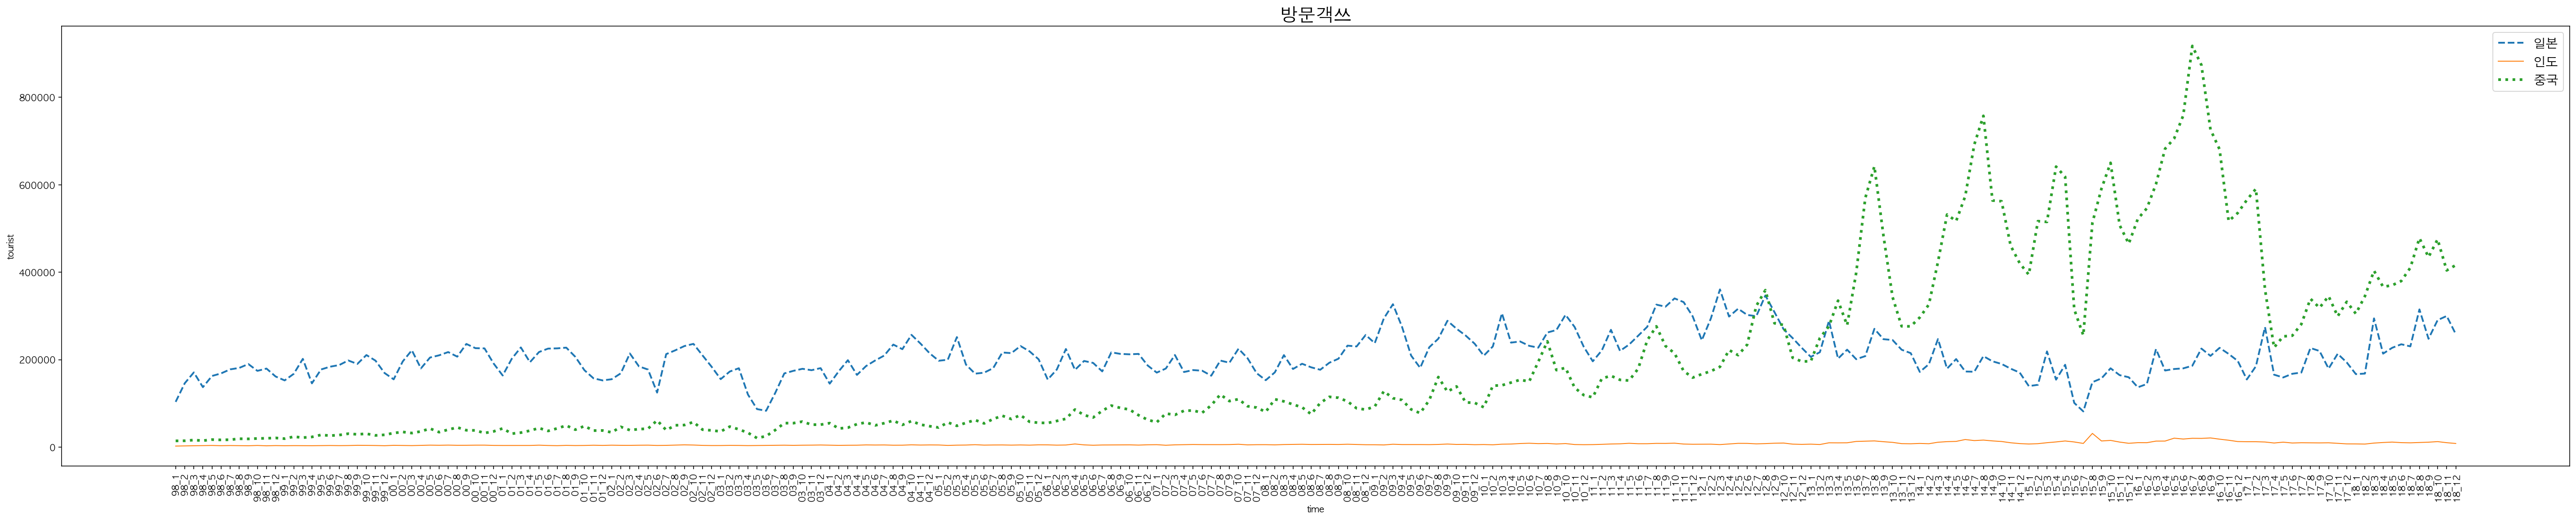

In [29]:
plt.figure(figsize=(50, 9))
#ax = sns.lineplot(data=plot_data_cut, x = 'index', y='중국')
plt.plot(plot_data_cut.index, plot_data_cut.일본, linestyle='--', linewidth=2) # 'dashed'
plt.plot(plot_data_cut.index, plot_data_cut.인도, linestyle='-', linewidth=1) # solid
plt.plot(plot_data_cut.index, plot_data_cut.중국, linestyle=':', linewidth=3) # dotted


plt.title('방문객쓰', fontsize=20)
plt.ylabel('tourist', fontsize=10)
plt.xlabel('time', fontsize=10)
plt.xticks(rotation=90)
plt.legend(['일본', '인도', '중국'],fontsize=14, loc='best')


plt.show()


In [23]:
#연도별 합만 보기
new_df_year = new_df[except_year_columns]
new_df_year['국가명'] = new_df['국가명']
new_df_year['cont'] = new_df['cont']

new_df_year = new_df_year.set_index('국가명')
new_df_year = new_df_year.iloc[7:]

/Users/taewoongkong/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/taewoongkong/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [27]:
# 원하는 대륙 선택
new_df_cont = new_df_year.loc[new_df_year['cont'] == 'Europe']

# 원하는 국가가 있다면 특정 국가로 좁히기 (권장)
plot_data = new_df_cont.loc[new_df_cont.index.isin(['영국','독일','프랑스'])]


# 트랜스포즈해야 lineplot을 찍을 수 있다

plot_data = plot_data.T

# 쓸데 없는 대륙 파트 커팅 + 내용물이 이상하게 Object로 되어있더라?
plot_data_cut = plot_data.iloc[:-1,:].astype(int)

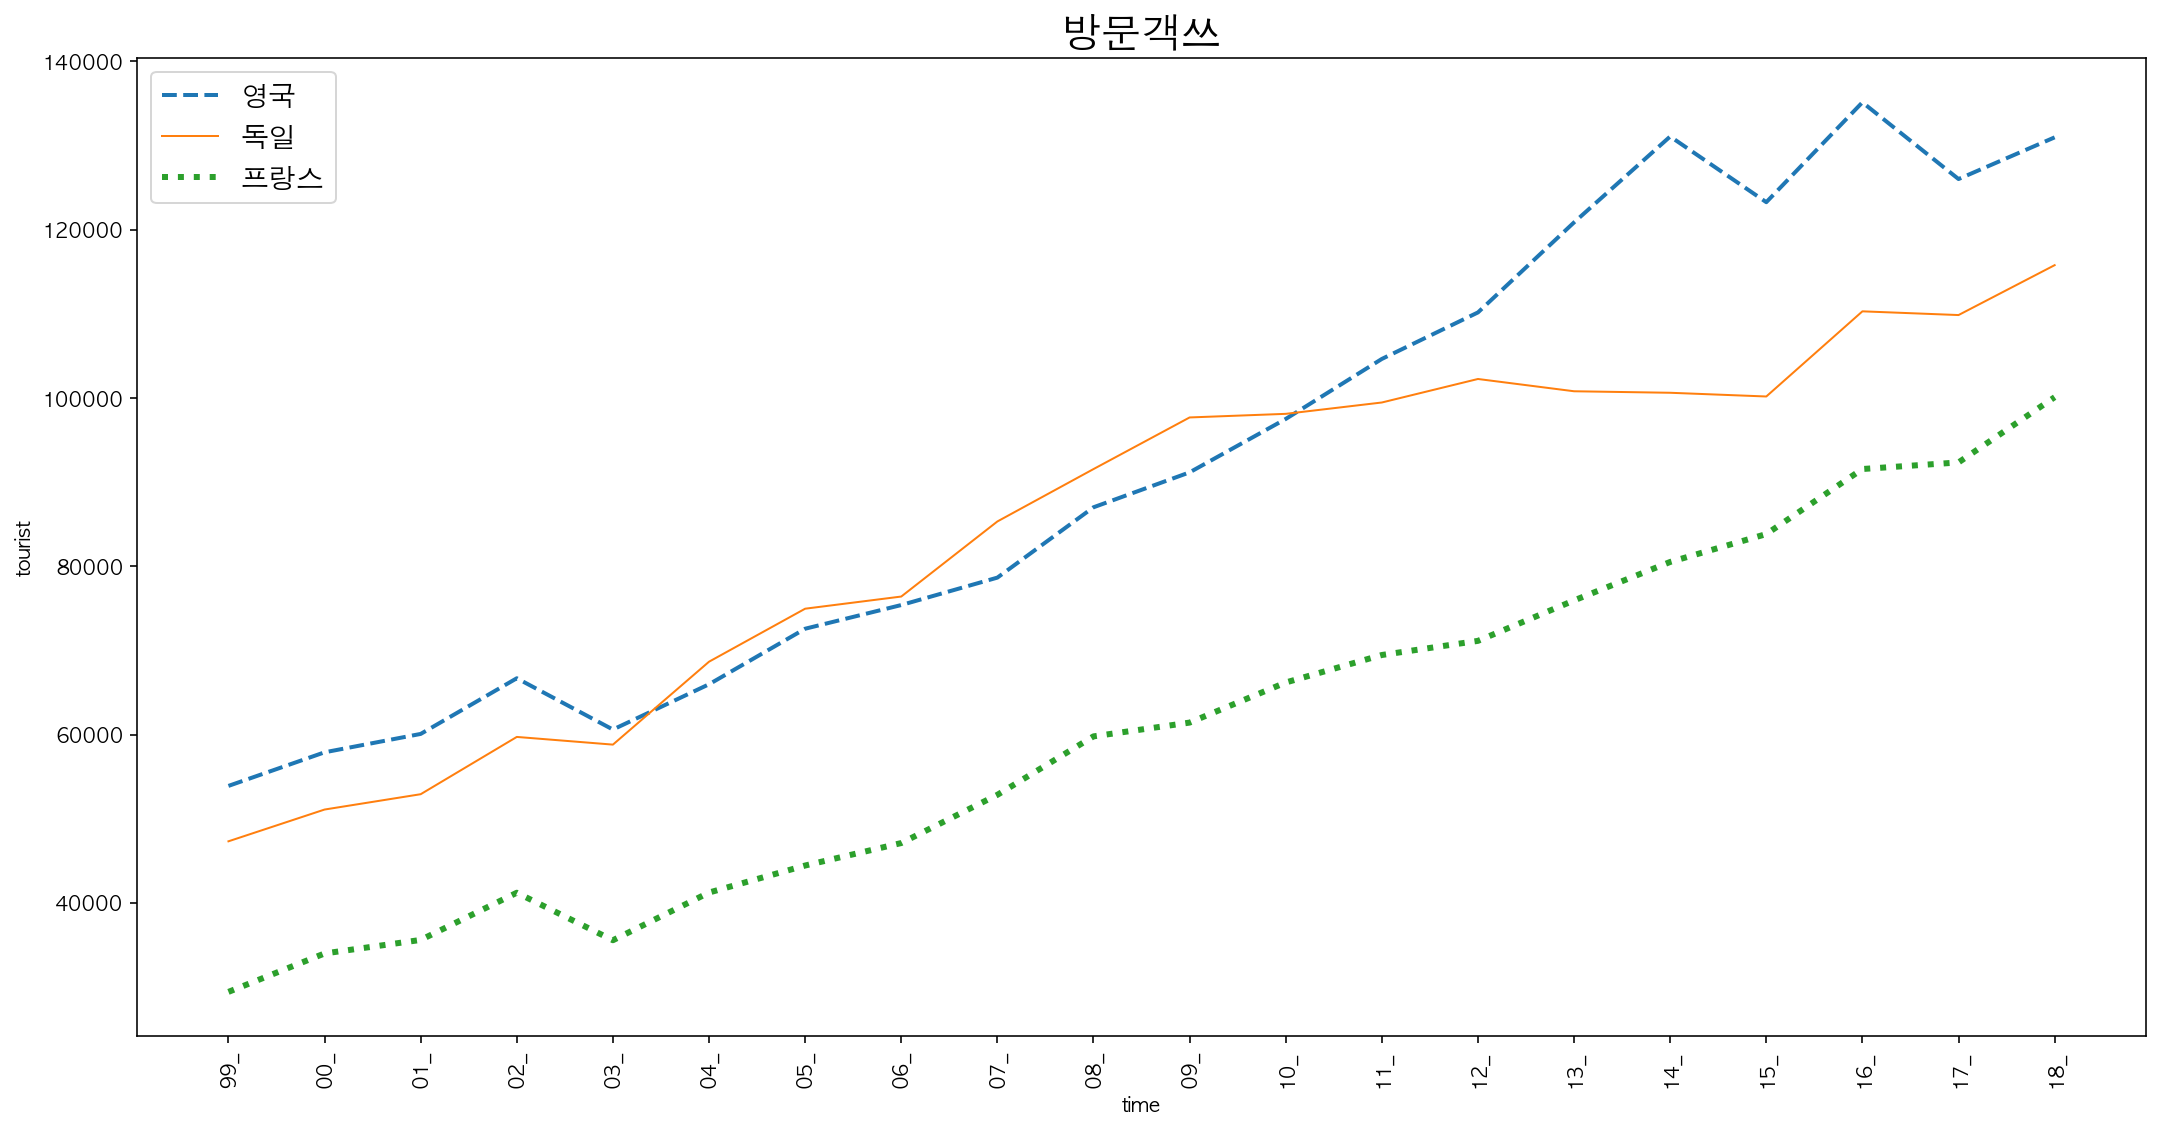

In [30]:
plt.figure(figsize=(18, 9))
#ax = sns.lineplot(data=plot_data_cut, x = 'index', y='중국')
plt.plot(plot_data_cut.index, plot_data_cut.영국, linestyle='--', linewidth=2) # 'dashed'
plt.plot(plot_data_cut.index, plot_data_cut.독일, linestyle='-', linewidth=1) # solid
plt.plot(plot_data_cut.index, plot_data_cut.프랑스, linestyle=':', linewidth=3) # dotted


plt.title('방문객쓰', fontsize=20)
plt.ylabel('tourist', fontsize=10)
plt.xlabel('time', fontsize=10)
plt.xticks(rotation=90)
plt.legend(['영국', '독일', '프랑스'],fontsize=14, loc='best')


plt.show()


In [45]:

europe = new_df.loc[new_df['cont'] == 'Europe'].iloc[2:].set_index('국가명')[except_year_columns]
europe['total'] = europe.sum(axis = 1, skipna = True) 
